**가중치 초기화를 하는 이유**
- 적절한 가중치 값이 주어지지 않을 경우 가중치 중 활성화되는 부분이 매우 적거나 편향될 수 있어서

**배치 정규화를 하는 이유**
- 들어온 데이터를 배치 단위로 평균이 0, 표준편차가 1인 데이터로 조정해주는 작업
- 학습속도 증가와 overfitting방지

# 01. 가중치 초기화

- 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생.
- 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있다.
- 모델의 활성화 값이 골고루 분포되는 것이 중요함

In [1]:
## Setting

from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

## 1) 선형 함수 가중치 초기화

### 제로값 초기화

2023-07-26 02:48:17.105875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


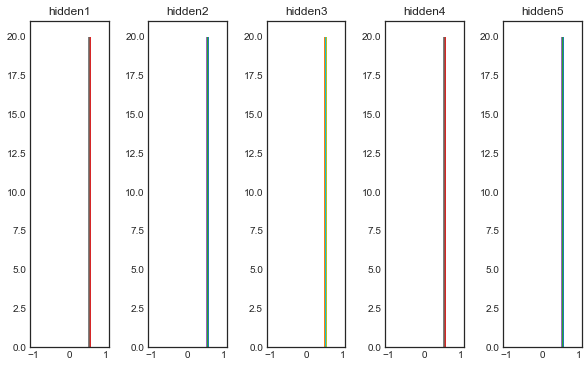

In [3]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

### 정규분포 초기화

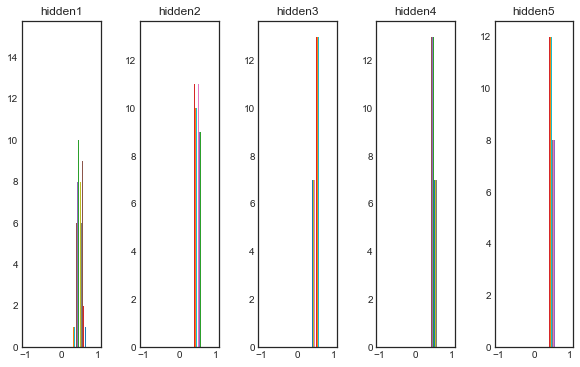

In [4]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

### 균일분포 초기화

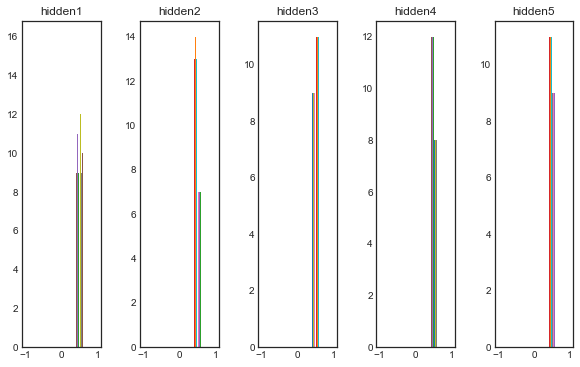

In [5]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

### Xavier(Glorot) 정규분포 초기화

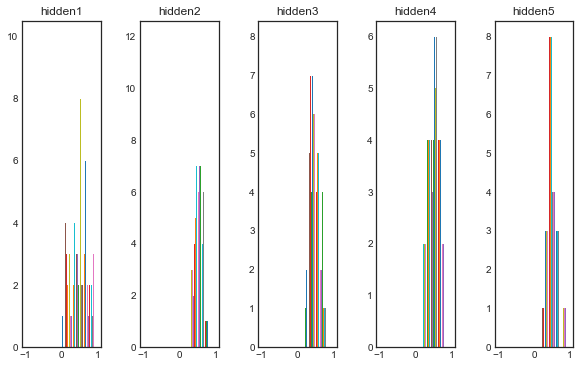

In [6]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

### Xavier(Glorot) 균일분포 초기화

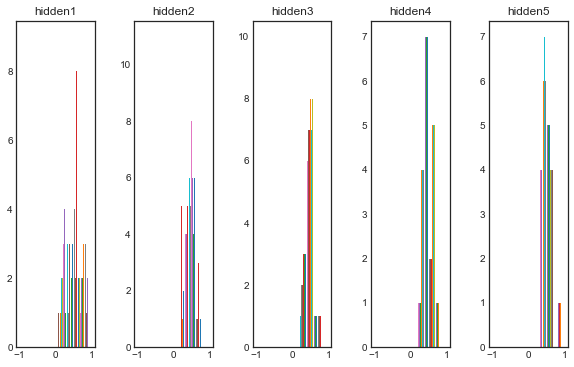

In [7]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

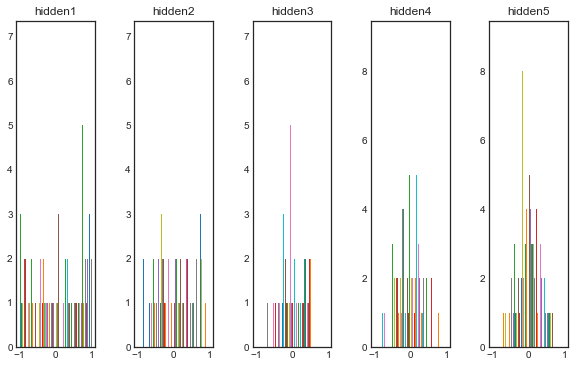

In [8]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

### He 정규분포 초기화

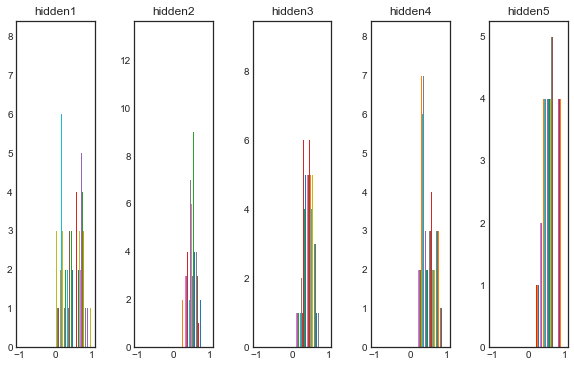

In [9]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

### He 균일분포 초기화

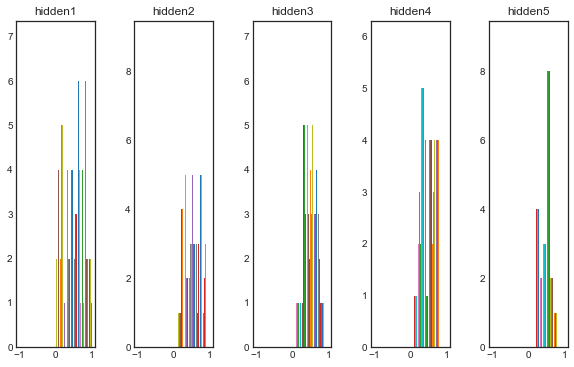

In [10]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

## 2) 비선형 함수 가중치 초기화

### 제로 초기화

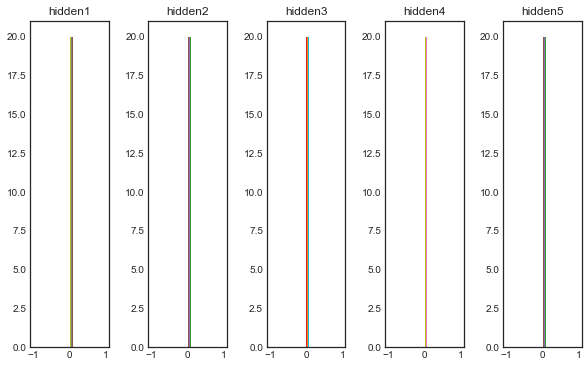

In [12]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

### 정규분포 초기화

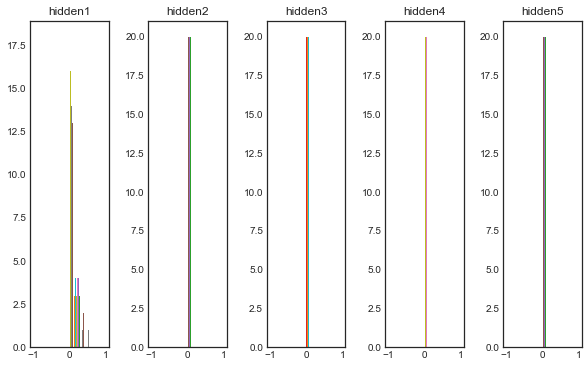

In [13]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

### 균일분포 초기화

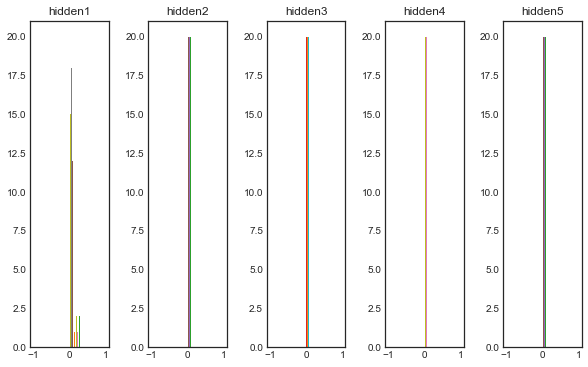

In [14]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

### Xavier(Glorot) 정규분포 초기화

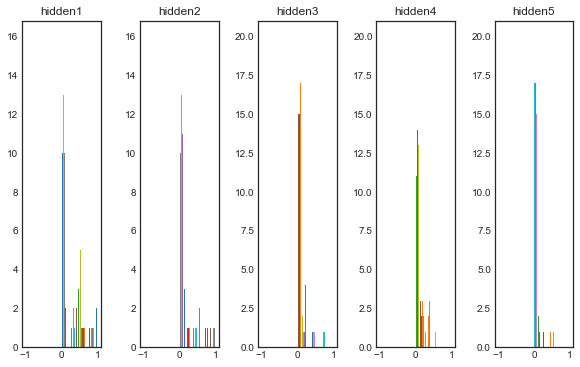

In [15]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

### Xavier(Glorot) 균일분포 초기화

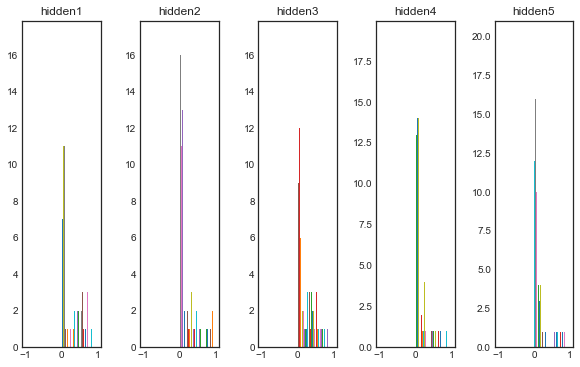

In [16]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

### He 정규분포 초기화

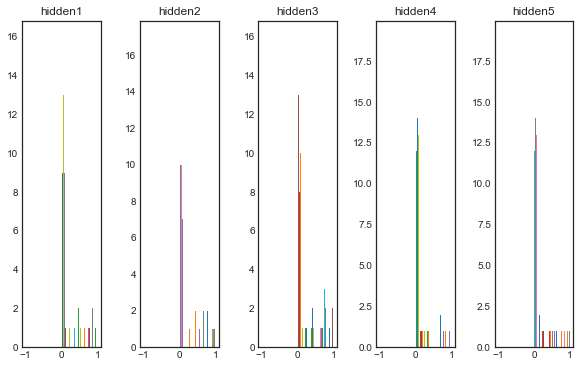

In [17]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

### He 균일분포 초기화

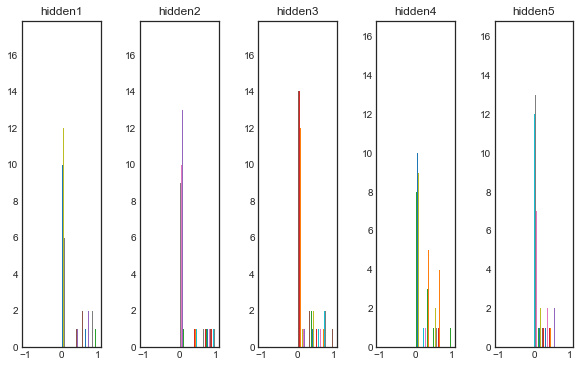

In [11]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

# 03. 배치 정규화

- 모델이 입력되는 샘플들을 균일하게 만드는 방법, 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미함

**특징**
- 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행
- 학습자체가 빨리 진행될 수 있도록 만들고, 학습후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행
- 배치 정규화는 데이터 전처리 단계에서 진행해도 되짐나 졍규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 Dense레이어 이후, 활성화 함수 이전에 활용

<img src="./imgs/batchN.png">

In [23]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [24]:
from tensorflow.keras import utils

word_index = reuters.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])
news = ' '.join([str(i) for i in train_data[0]])
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 42ms/step - loss: 2.0976 - accuracy: 0.5699 - val_loss: 1.3818 - val_accuracy: 0.6946
Epoch 2/40
18/18 [==============================] - 0s 27ms/step - loss: 1.0667 - accuracy: 0.7707 - val_loss: 1.1135 - val_accuracy: 0.7533
Epoch 3/40
18/18 [==============================] - 0s 28ms/step - loss: 0.7431 - accuracy: 0.8411 - val_loss: 1.0058 - val_accuracy: 0.7729
Epoch 4/40
18/18 [==============================] - 0s 27ms/step - loss: 0.5320 - accuracy: 0.8863 - val_loss: 0.9466 - val_accuracy: 0.7894
Epoch 5/40
18/18 [==============================] - 0s 26ms/step - loss: 0.3942 - accuracy: 0.9157 - val_loss: 0.9086 - val_accuracy: 0.7979
Epoch 6/40
18/18 [==============================] - 1s 28ms/step - loss: 0.2990 - accuracy: 0.9334 - val_loss: 0.9250 - val_accuracy: 0.7996
Epoch 7/40
18/18 [==============================] - 1s 30ms/step - loss: 0.2404 - accuracy: 0.9434 - val_loss: 0.9594 - val_accuracy: 0.7947
Epoch 8/40
18

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
# batch N
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 128)             

In [30]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 46ms/step - loss: 1.6806 - accuracy: 0.6623 - val_loss: 3.3288 - val_accuracy: 0.7449
Epoch 2/40
18/18 [==============================] - 1s 34ms/step - loss: 0.6150 - accuracy: 0.8853 - val_loss: 3.0639 - val_accuracy: 0.7453
Epoch 3/40
18/18 [==============================] - 1s 32ms/step - loss: 0.3390 - accuracy: 0.9319 - val_loss: 2.7356 - val_accuracy: 0.7093
Epoch 4/40
18/18 [==============================] - 1s 30ms/step - loss: 0.2243 - accuracy: 0.9481 - val_loss: 2.3593 - val_accuracy: 0.7021
Epoch 5/40
18/18 [==============================] - 1s 32ms/step - loss: 0.1749 - accuracy: 0.9508 - val_loss: 2.0464 - val_accuracy: 0.6741
Epoch 6/40
18/18 [==============================] - 1s 31ms/step - loss: 0.1511 - accuracy: 0.9527 - val_loss: 1.7194 - val_accuracy: 0.7070
Epoch 7/40
18/18 [==============================] - 1s 34ms/step - loss: 0.1344 - accuracy: 0.9503 - val_loss: 1.4746 - val_accuracy: 0.7449
Epoch 8/40
18

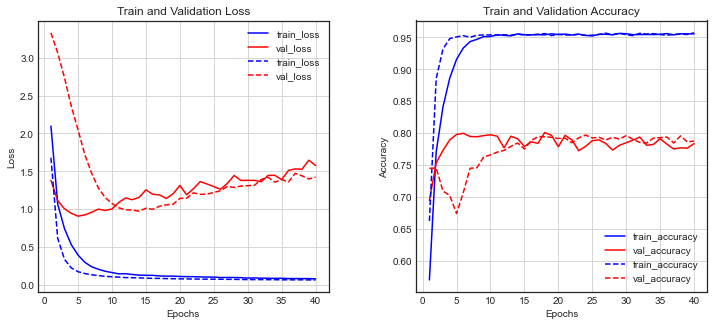

In [31]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

diff_history(history, batch_norm_history)

# 기본 모델과 배치 정규화를 적용한 모델을 비교해보면, 
# 배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있음

# 실습

In [34]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.Activation('relu')) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       


 hNormalization)                                                 
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 activation_9 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1,303,598
Trainable params: 1,303,086
Non-trainable params: 512
_________________________________________________________________


In [35]:
history_has_begun = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 48ms/step - loss: 1.6779 - accuracy: 0.6652 - val_loss: 3.3405 - val_accuracy: 0.7275
Epoch 2/40
18/18 [==============================] - 1s 31ms/step - loss: 0.5179 - accuracy: 0.9109 - val_loss: 3.1569 - val_accuracy: 0.7391
Epoch 3/40
18/18 [==============================] - 1s 31ms/step - loss: 0.2892 - accuracy: 0.9440 - val_loss: 2.9243 - val_accuracy: 0.7182
Epoch 4/40
18/18 [==============================] - 1s 30ms/step - loss: 0.2146 - accuracy: 0.9518 - val_loss: 2.6135 - val_accuracy: 0.7199
Epoch 5/40
18/18 [==============================] - 1s 33ms/step - loss: 0.1859 - accuracy: 0.9500 - val_loss: 2.3603 - val_accuracy: 0.7444
Epoch 6/40
18/18 [==============================] - 1s 29ms/step - loss: 0.1590 - accuracy: 0.9521 - val_loss: 2.0778 - val_accuracy: 0.7533
Epoch 7/40
18/18 [==============================] - 1s 30ms/step - loss: 0.1456 - accuracy: 0.9515 - val_loss: 1.7758 - val_accuracy: 0.7453
Epoch 8/40
18

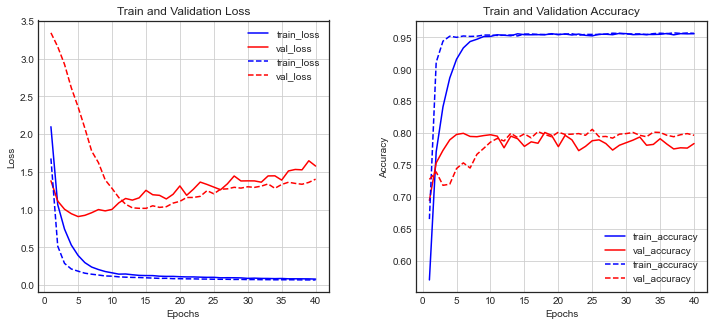

In [36]:
diff_history(history, history_has_begun)